In [1]:
import pristine_to_mock as ptm
import analyze_mock
import matplotlib
import matplotlib.pyplot as pyplot

## Step 0: convert to nJy and add metadata to header
### This step overwrites the "mocks.fits" file, so run this first to restart the pipeline

In [2]:
ff='/Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.fits'
ffout='/Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits'
ptm.output_pristine_fits_image(ff,ffout)

## Inspect Step 0 output

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'SimulatedImage', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')


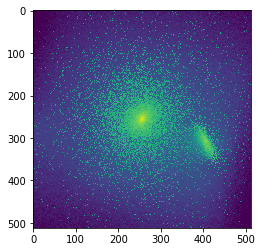

In [3]:
fo=fits.open(ffout)
fo.info()
print(fo['SimulatedImage'].header.cards)
pyplot.imshow(np.log10(fo['SimulatedImage'].data))

## Step 1a: convolve with simple PSF and inspect output

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'MockImage_Noiseless', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')
('FWHMPIX', 4.584869643280763, 'pixels')
('FWHM', 0.3, 'arcsec')
('SIGMAPIX', 1.947014869758553, 'pixels')
('SIGMA', 0.1273982700432029, 'arcsec')
('PIXSIZE', 0.06543261277660473, 'arcsec')


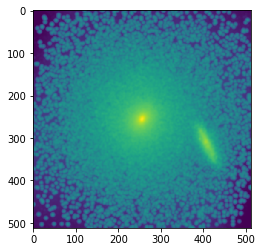

In [4]:
ptm.convolve_with_fwhm(ffout,fwhm_arcsec=0.3)
fo=fits.open(ffout)
fo.info()
print(fo['MockImage_Noiseless'].header.cards)
pyplot.imshow(np.log10(fo['MockImage_Noiseless'].data))

## Step 1b: add simple noise model (following Snyder+19); CANDELS-ish

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
  3  MockImage_SB25    1 ImageHDU        18   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'MockImage_SB25', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')
('FWHMPIX', 4.584869643280763, 'pixels')
('FWHM', 0.3, 'arcsec')
('SIGMAPIX', 1.947014869758553, 'pixels')
('SIGMA', 0.1273982700432029, 'arcsec')
('PIXSIZE', 0.06543261277660473, 'arcsec')
('SBLIM', 25.0, 'mag/arcs

/Users/gsnyder/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


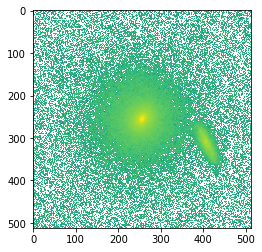

In [5]:
ptm.add_simple_noise(ffout,sb_maglim=25.0,sb_label='25')
fo=fits.open(ffout)
fo.info()
print(fo['MockImage_SB25'].header.cards)
pyplot.imshow(np.log10(fo['MockImage_SB25'].data))

## Step 1b: Now make an ultra-deep version

/Users/gsnyder/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


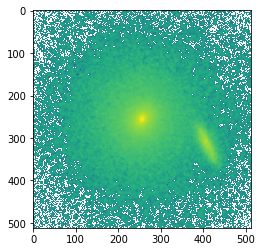

In [6]:
ptm.add_simple_noise(ffout,sb_maglim=28.0,sb_label='28')
fo=fits.open(ffout)
pyplot.imshow(np.log10(fo['MockImage_SB28'].data))

## Step 1b: How about a shallow one?

/Users/gsnyder/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


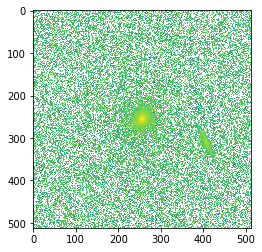

In [7]:
ptm.add_simple_noise(ffout,sb_maglim=22.0,sb_label='22')
fo=fits.open(ffout)
pyplot.imshow(np.log10(fo['MockImage_SB22'].data))

## Step 2a: Detect sources with PhotUtils

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
  3  MockImage_SB25    1 ImageHDU        18   (512, 512)   float64   
  4  MockImage_SB28    1 ImageHDU        18   (512, 512)   float64   
  5  MockImage_SB22    1 ImageHDU        18   (512, 512)   float64   
  6  SEGMAP        1 ImageHDU         8   (512, 512)   int32   
  7  SEGMAP_PROPS    1 BinTableHDU     92   1R x 29C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
None
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', 32, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'numbe

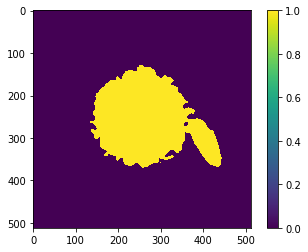

In [8]:
seg,kernel=analyze_mock.detect_sources(ffout,ext_name='MockImage_SB25')
pyplot.imshow(seg.data); pyplot.colorbar()
fo=fits.open(ffout)
print(fo.info())
print(fo['SEGMAP'].header.cards)

## Step 2b: Optional de-blending step

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
  3  MockImage_SB25    1 ImageHDU        18   (512, 512)   float64   
  4  MockImage_SB28    1 ImageHDU        18   (512, 512)   float64   
  5  MockImage_SB22    1 ImageHDU        18   (512, 512)   float64   
  6  SEGMAP        1 ImageHDU         8   (512, 512)   int32   
  7  SEGMAP_PROPS    1 BinTableHDU     92   1R x 29C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  8  DEBLEND       1 ImageHDU         8   (512, 512)   int32   
  9  DEBLEND_PROPS    1 BinTableHDU     92   5R x 29C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


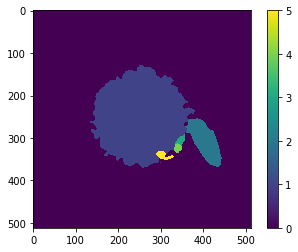

In [9]:
analyze_mock.deblend_sources(ffout,seg,kernel,ext_name='MockImage_SB25')
fo=fits.open(ffout)
print(fo.info())
pyplot.imshow(fo['DEBLEND'].data); pyplot.colorbar()

In [10]:
deblend_props=astropy.table.Table(fo['DEBLEND_PROPS'].data)
print(deblend_props)
print(fo['DEBLEND_PROPS'].data['source_sum'])
fluxes=np.asarray(fo['DEBLEND_PROPS'].data['source_sum'])

 id     xcentroid      ...          cxy                  cyy         
--- ------------------ ... --------------------- --------------------
  1  253.8430792184493 ... 8.971588892576521e-05 0.001074173366432074
  2 406.18004837327635 ... -0.014403301714424976 0.005819591683064495
  3 346.29322824616946 ...    0.0339201239256776  0.04158618565424517
  4  339.8624570025086 ...  0.011567892815712669 0.032194094821653405
  5   305.656059215413 ... -0.027382839669007068  0.04690543699488426
[1205858.64239781  177252.21498604    1742.79283915    1615.98920585
    2558.43721546]


## Step 3a: Choose source and Segmap to analyze further

In [11]:
#here, use 2 criteria to determine source to measure:
#1. it's the brightest source (This might be a bad assumptions)
#2. Use the source which overlaps the center
brightest_index=np.argmax(fluxes)
brightest_id=deblend_props['id'][brightest_index]
print(brightest_id)
npix=fo['MockImage_SB25'].data.shape[0]
center_slice=fo['DEBLEND'].data[int(npix/2)-2:int(npix/2)+2,int(npix/2)-2:int(npix/2)+2]
assert(len(np.unique(center_slice))==1)
center_source_id=deblend_props['id'][deblend_props['id']==center_slice[0,0]].data[0]
print(center_source_id)
central_index=deblend_props['id']==center_slice[0,0]
print(central_index)
#go forward with central index only ?

1
1
[ True False False False False]


## Step 3b: run StatMorph and inspect results for selected source

In [12]:
source_morph=analyze_mock.run_statmorph(ffout,ext_name='MockImage_SB25',seg_name='DEBLEND')

Finished processing source 1.

Finished processing source 2.



Finished processing source 3.



Finished processing source 4.



Finished processing source 5.



In [13]:
sm=np.asarray(source_morph)[central_index][0]
print('Parametric:  ')
print('Sersic n: ', sm.sersic_n)
print('Non-Parametric:  ')
print('Gini: ', sm.gini); print('M20: ', sm.m20)
print('A:    ',sm.asymmetry) ; print('M:    ',sm.multimode) ; print('D:    ',sm.deviation)

Parametric:  
Sersic n:  1.4795135369149512
Non-Parametric:  
Gini:  0.6007029214420193
M20:  -2.269161959701516
A:     0.031840431143450316
M:     0.0016672224074691564
D:     0.01428846103984393


## From here, use morphology parameters to classify mergers
* The 5 non-parametric measurements above (from F814W & F160W images) are the 10 inputs to Snyder et al. (2019) Random Forests, which have associated numpy objects to apply that classifier to them
* Alternative is to use C-A or G-M20 merger statistics (sm.gini_m20_merger) or related 2-D diagnostics

## Caveats and assumptions in draft pipeline
* Several input parameters are hard-coded:  field of view in KPC, cosmology, and redshift of source
* noise and PSF models are ultra-simple
* used a super-basic source ID algorithm to pinpoint the source located at the center of each image
* Used deblended image instead of raw segmented image from PhotUtils (differs slightly from Snyder et al. 2019) -- this choice can be changed by switching to "SEGMAP" hdus instead of "DEBLEND" hdus in pipeline above.
* Used essentially the default PhotUtils source detection and deblending parameters -- might require fine-tuning after inspecting large numbers of images
* For source and morphology measurements, assumed arbitrary "Gain" value. To obtain more accurate source flux errors and morphology S/N measurements, create a real "error" image using PhotUtils, and pass this as a weight map to StatMorph.  This should not drastically affect morphological parameters, but may affect conclusions about marginal detections/faint sources/etc.